<a href="https://colab.research.google.com/github/GMobinit/cat_dog_recognition_model/blob/VGG_model/cat_dog_recognition_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [4]:
## Upload your kaggle credentials to content directroy
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [33]:
! wget https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

--2025-10-30 08:18:06--  https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 72.247.96.197, 2600:1406:5400:2ac::317f, 2600:1406:5400:2ae::317f
Connecting to download.microsoft.com (download.microsoft.com)|72.247.96.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   173MB/s    in 7.8s    

2025-10-30 08:18:14 (101 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [6]:
import tensorflow as tf
import zipfile

In [7]:
zipfile.ZipFile('kagglecatsanddogs_5340.zip', 'r').extractall('dataset')

In [8]:
import pathlib
data_dir = pathlib.Path('dataset/kagglecatsanddogs_3367a/PetImages').with_suffix('')

In [9]:
cat_image_count = len(list(data_dir.glob('Cat/*.jpg')))
dog_image_count = len(list(data_dir.glob('Dog/*.jpg')))
print(f"cat image count: {cat_image_count}, dog image count: {dog_image_count}, all images: {cat_image_count+dog_image_count}")

cat image count: 12490, dog image count: 12469, all images: 24959


In [10]:
import PIL

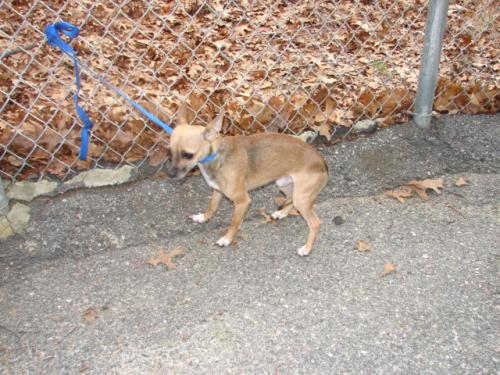

In [11]:
PIL.Image.open(str(list(data_dir.glob('Dog/*'))[0]))

In [12]:
list_ds  = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(cat_image_count+dog_image_count, reshuffle_each_iteration=False)

In [13]:
for file_add in list_ds.take(5):
  print(file_add)

tf.Tensor(b'dataset/kagglecatsanddogs_3367a/PetImages/Dog/5695.jpg', shape=(), dtype=string)
tf.Tensor(b'dataset/kagglecatsanddogs_3367a/PetImages/Cat/9134.jpg', shape=(), dtype=string)
tf.Tensor(b'dataset/kagglecatsanddogs_3367a/PetImages/Cat/12095.jpg', shape=(), dtype=string)
tf.Tensor(b'dataset/kagglecatsanddogs_3367a/PetImages/Dog/6239.jpg', shape=(), dtype=string)
tf.Tensor(b'dataset/kagglecatsanddogs_3367a/PetImages/Cat/2683.jpg', shape=(), dtype=string)


In [14]:
labels = []
for item in data_dir.glob('*'):
  labels.append(item.name)

print(labels)

['Cat', 'Dog']


In [15]:
## train validation split
validation_percentage = 0.2
validation_size = int((cat_image_count+dog_image_count)*validation_percentage)

validation_ds = list_ds.take(validation_size)
train_ds = list_ds.skip(validation_size)

print(f'validation size {tf.data.experimental.cardinality(validation_ds)}, train size {len(train_ds)}')

validation size 4991, train size 19970


In [16]:
import os
def get_label(file_path):
  separated_path = tf.strings.split(file_path, os.path.sep)
  label = separated_path[-2]
  one_hotted_label = (label == labels)
  return tf.argmax(one_hotted_label)

In [17]:
get_label('dataset/kagglecatsanddogs_3367a/PetImages/Cat/7411.jpg')

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [18]:
batch_size = 32
img_height = 180
img_width = 180

In [19]:
def decode_img(encoded_img):
  img = tf.io.decode_image(encoded_img, channels=3, dtype=tf.dtypes.bfloat16, expand_animations=False)
  img = tf.image.resize(img, [img_height, img_width], method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  return img

In [24]:
def process_path(img_path):
  label = get_label(img_path)
  img = tf.io.read_file(img_path)
  img = decode_img(img)
  img = tf.cast(img, tf.float32)
  # img = ((img/255))
  return img, label

In [25]:
process_path('dataset/kagglecatsanddogs_3367a/PetImages/Dog/7411.jpg')

(<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
 array([[[0.23046875, 0.234375  , 0.2421875 ],
         [0.15625   , 0.171875  , 0.18359375],
         [0.21875   , 0.24609375, 0.26953125],
         ...,
         [0.3359375 , 0.32421875, 0.3046875 ],
         [0.30859375, 0.296875  , 0.26953125],
         [0.28125   , 0.2734375 , 0.2265625 ]],
 
        [[0.25390625, 0.2578125 , 0.23828125],
         [0.24609375, 0.25390625, 0.25      ],
         [0.2109375 , 0.2265625 , 0.23828125],
         ...,
         [0.41796875, 0.40625   , 0.37890625],
         [0.359375  , 0.34765625, 0.3125    ],
         [0.265625  , 0.2578125 , 0.2109375 ]],
 
        [[0.34765625, 0.3359375 , 0.30859375],
         [0.3828125 , 0.37890625, 0.359375  ],
         [0.29296875, 0.29296875, 0.28515625],
         ...,
         [0.296875  , 0.28515625, 0.2578125 ],
         [0.26171875, 0.25      , 0.21484375],
         [0.25      , 0.2421875 , 0.1953125 ]],
 
        ...,
 
        [[0.1875    , 0.16796875

In [32]:
AUTOTUNE = tf.data.AUTOTUNE

mapped_train_ds = train_ds.map(map_func= process_path,num_parallel_calls=AUTOTUNE)
mapped_validation_ds = validation_ds.map(map_func=process_path, num_parallel_calls=AUTOTUNE)

# Filter out images that cause decoding errors
def is_valid_image(image, label):
  return image.numpy().shape[-1] == 3

mapped_train_ds = mapped_train_ds.filter(is_valid_image)
mapped_validation_ds = mapped_validation_ds.filter(is_valid_image)

AttributeError: in user code:

    File "/tmp/ipython-input-2235507764.py", line 8, in is_valid_image  *
        return image.numpy().shape[-1] == 3

    AttributeError: 'SymbolicTensor' object has no attribute 'numpy'


In [30]:
# for image, label in mapped_train_ds.take(5):
#   print("Image shape: ", image.numpy().shape)
#   print("Image label: ", label.numpy())
for image, label in mapped_train_ds:
  if image.numpy().shape[-1] != 3:
    print(image.numpy())

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Error in user-defined function passed to ParallelMapDatasetV2:12 transformation with iterator: Iterator::Root::Prefetch::Filter::ParallelMapV2: Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

In [ ]:
def configure_for_performance(ds: tf.data.Dataset):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=500)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

In [ ]:
high_performance_train_ds = configure_for_performance(mapped_train_ds)
high_performance_validation_ds = configure_for_performance(mapped_validation_ds)

In [ ]:
for a,b in high_performance_train_ds.take(1):
  print(a.shape)
  print(b.numpy())

(32, 180, 180, 3)
[0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0]


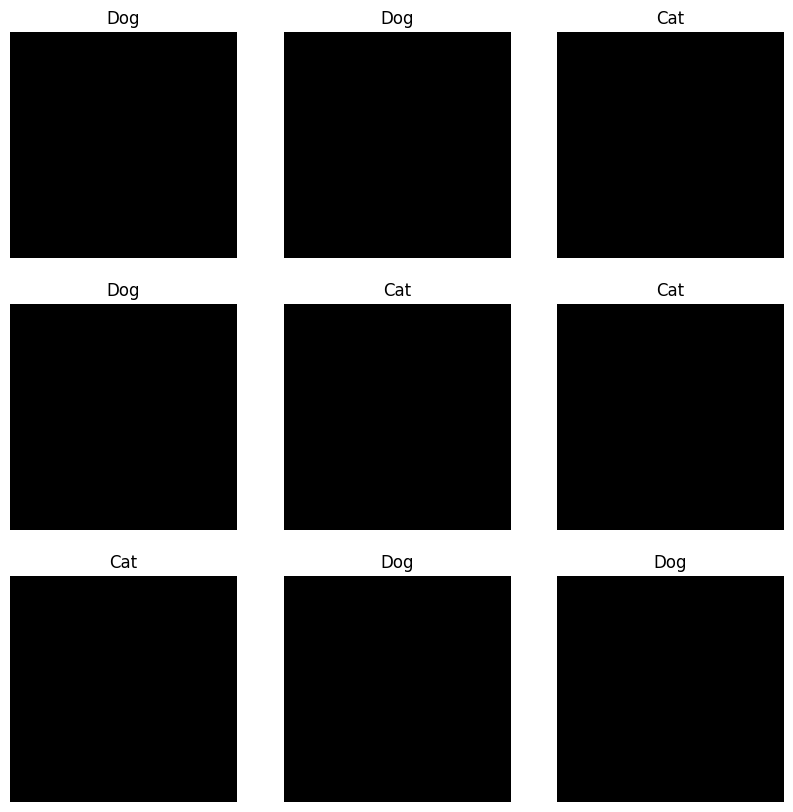

In [ ]:
import matplotlib.pyplot as plt

for image_batch, label_batch in high_performance_train_ds.take(1):

  plt.figure(figsize=(10,10))
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint32"))
    label = label_batch[i]
    plt.title(labels[label])
    plt.axis("off")

In [ ]:
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(180,180,3))

In [ ]:
base_model.trainable = False

In [ ]:
flatten_layer = tf.keras.layers.GlobalAveragePooling2D()
dense_layer = tf.keras.layers.Dense(100, activation='relu')
dropout_layer = tf.keras.layers.Dropout(0.5)
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [ ]:
model = tf.keras.models.Sequential([
  base_model,
  flatten_layer,
  dense_layer,
  dropout_layer,
  prediction_layer
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss = tf.keras.losses.BinaryCrossentropy, metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,766,089 (56.33 MB)

 Trainable params: 51,401 (200.79 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.fit(high_performance_train_ds, epochs=100, validation_data=high_performance_validation_ds)

Epoch 1/100
 66/625 ━━━━━━━━━━━━━━━━━━━━ 1:15 135ms/step - acc: 0.5001 - loss: 0.7294

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) INVALID_ARGUMENT:  Error in user-defined function passed to ParallelMapDatasetV2:195 transformation with iterator: Iterator::Root::Prefetch::BatchV2::Shuffle::MemoryCacheImpl::ParallelMapV2: Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_4]]
  (1) INVALID_ARGUMENT:  Error in user-defined function passed to ParallelMapDatasetV2:195 transformation with iterator: Iterator::Root::Prefetch::BatchV2::Shuffle::MemoryCacheImpl::ParallelMapV2: Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_multi_step_on_iterator_22690]